#**EMPLOYEE SATISFACTION**

The dataset used can be consulted here: https://www.kaggle.com/datasets/mohamedharris/employee-satisfaction-index-dataset 

## Problem Description

Job satisfaction is one of the most challenging concerns that today's managers face when it comes to managing their personnel. In this sense, we decided to analyze the available information in the previous dataset in order to help companies identify trends and insights regarding employee satisfaction. Companies are increasingly concerned with the satisfaction of their workers and our analysis will help them implement measures to improve employee satisfaction, as well as better understand this problem, including which workers are most likely to be dissatisfied in the company.


##  Variables' Description

The dataset has the following attributes:

PREDICTORS:

* **"emp_id"** - Unique ID of the employee
* **"age"** - age of the empolyee
* **"Dept"** - department to which the employee belongs
* **"location"** - employee location
* **"education"** - employee's education status
* **"recruitment_type"** - mode of recruitment to which the employee was subjected
* **"job_level"** - the job level of the employee: 1 to 5, 1 being the least and 5 being the highest position
* **"rating"** - the previous year rating of the employee: 1 to 5, 1 being the lowest score and 5 being the highest score
* **"onsite"** - 1 if the empolyee ever went to an onsite location, and 0 otherwise
* **"awards"** - No. of awards received by the empolyee
* **"certifications"** - 1 if the empolyee is certified, and 0 otherwise
* **"salary"** - Net Salary of the employee

OUTCOME VARIABLE:

* **"satisfied"** - answers the question: "Is the employee satisfied or not? 1 if the employee is satisfied, and 0 otherwise

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/Employee Satisfaction Index.csv')
df

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [5]:
df = df.drop(df.columns[:2], axis=1)
df

,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


# Graphical Data Analysis


In [21]:
import seaborn as sns

<Axes: xlabel='satisfied', ylabel='Count'>

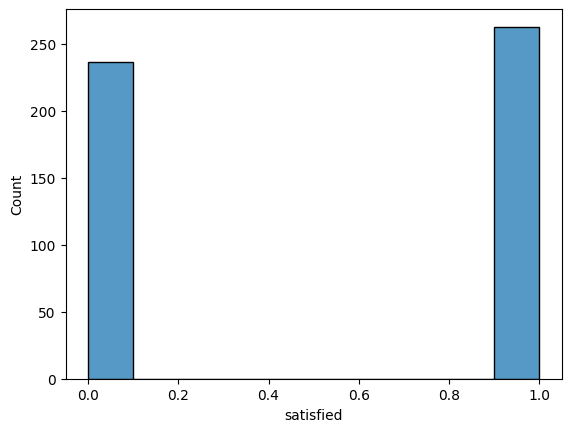

In [24]:
sns.histplot(df['satisfied'])

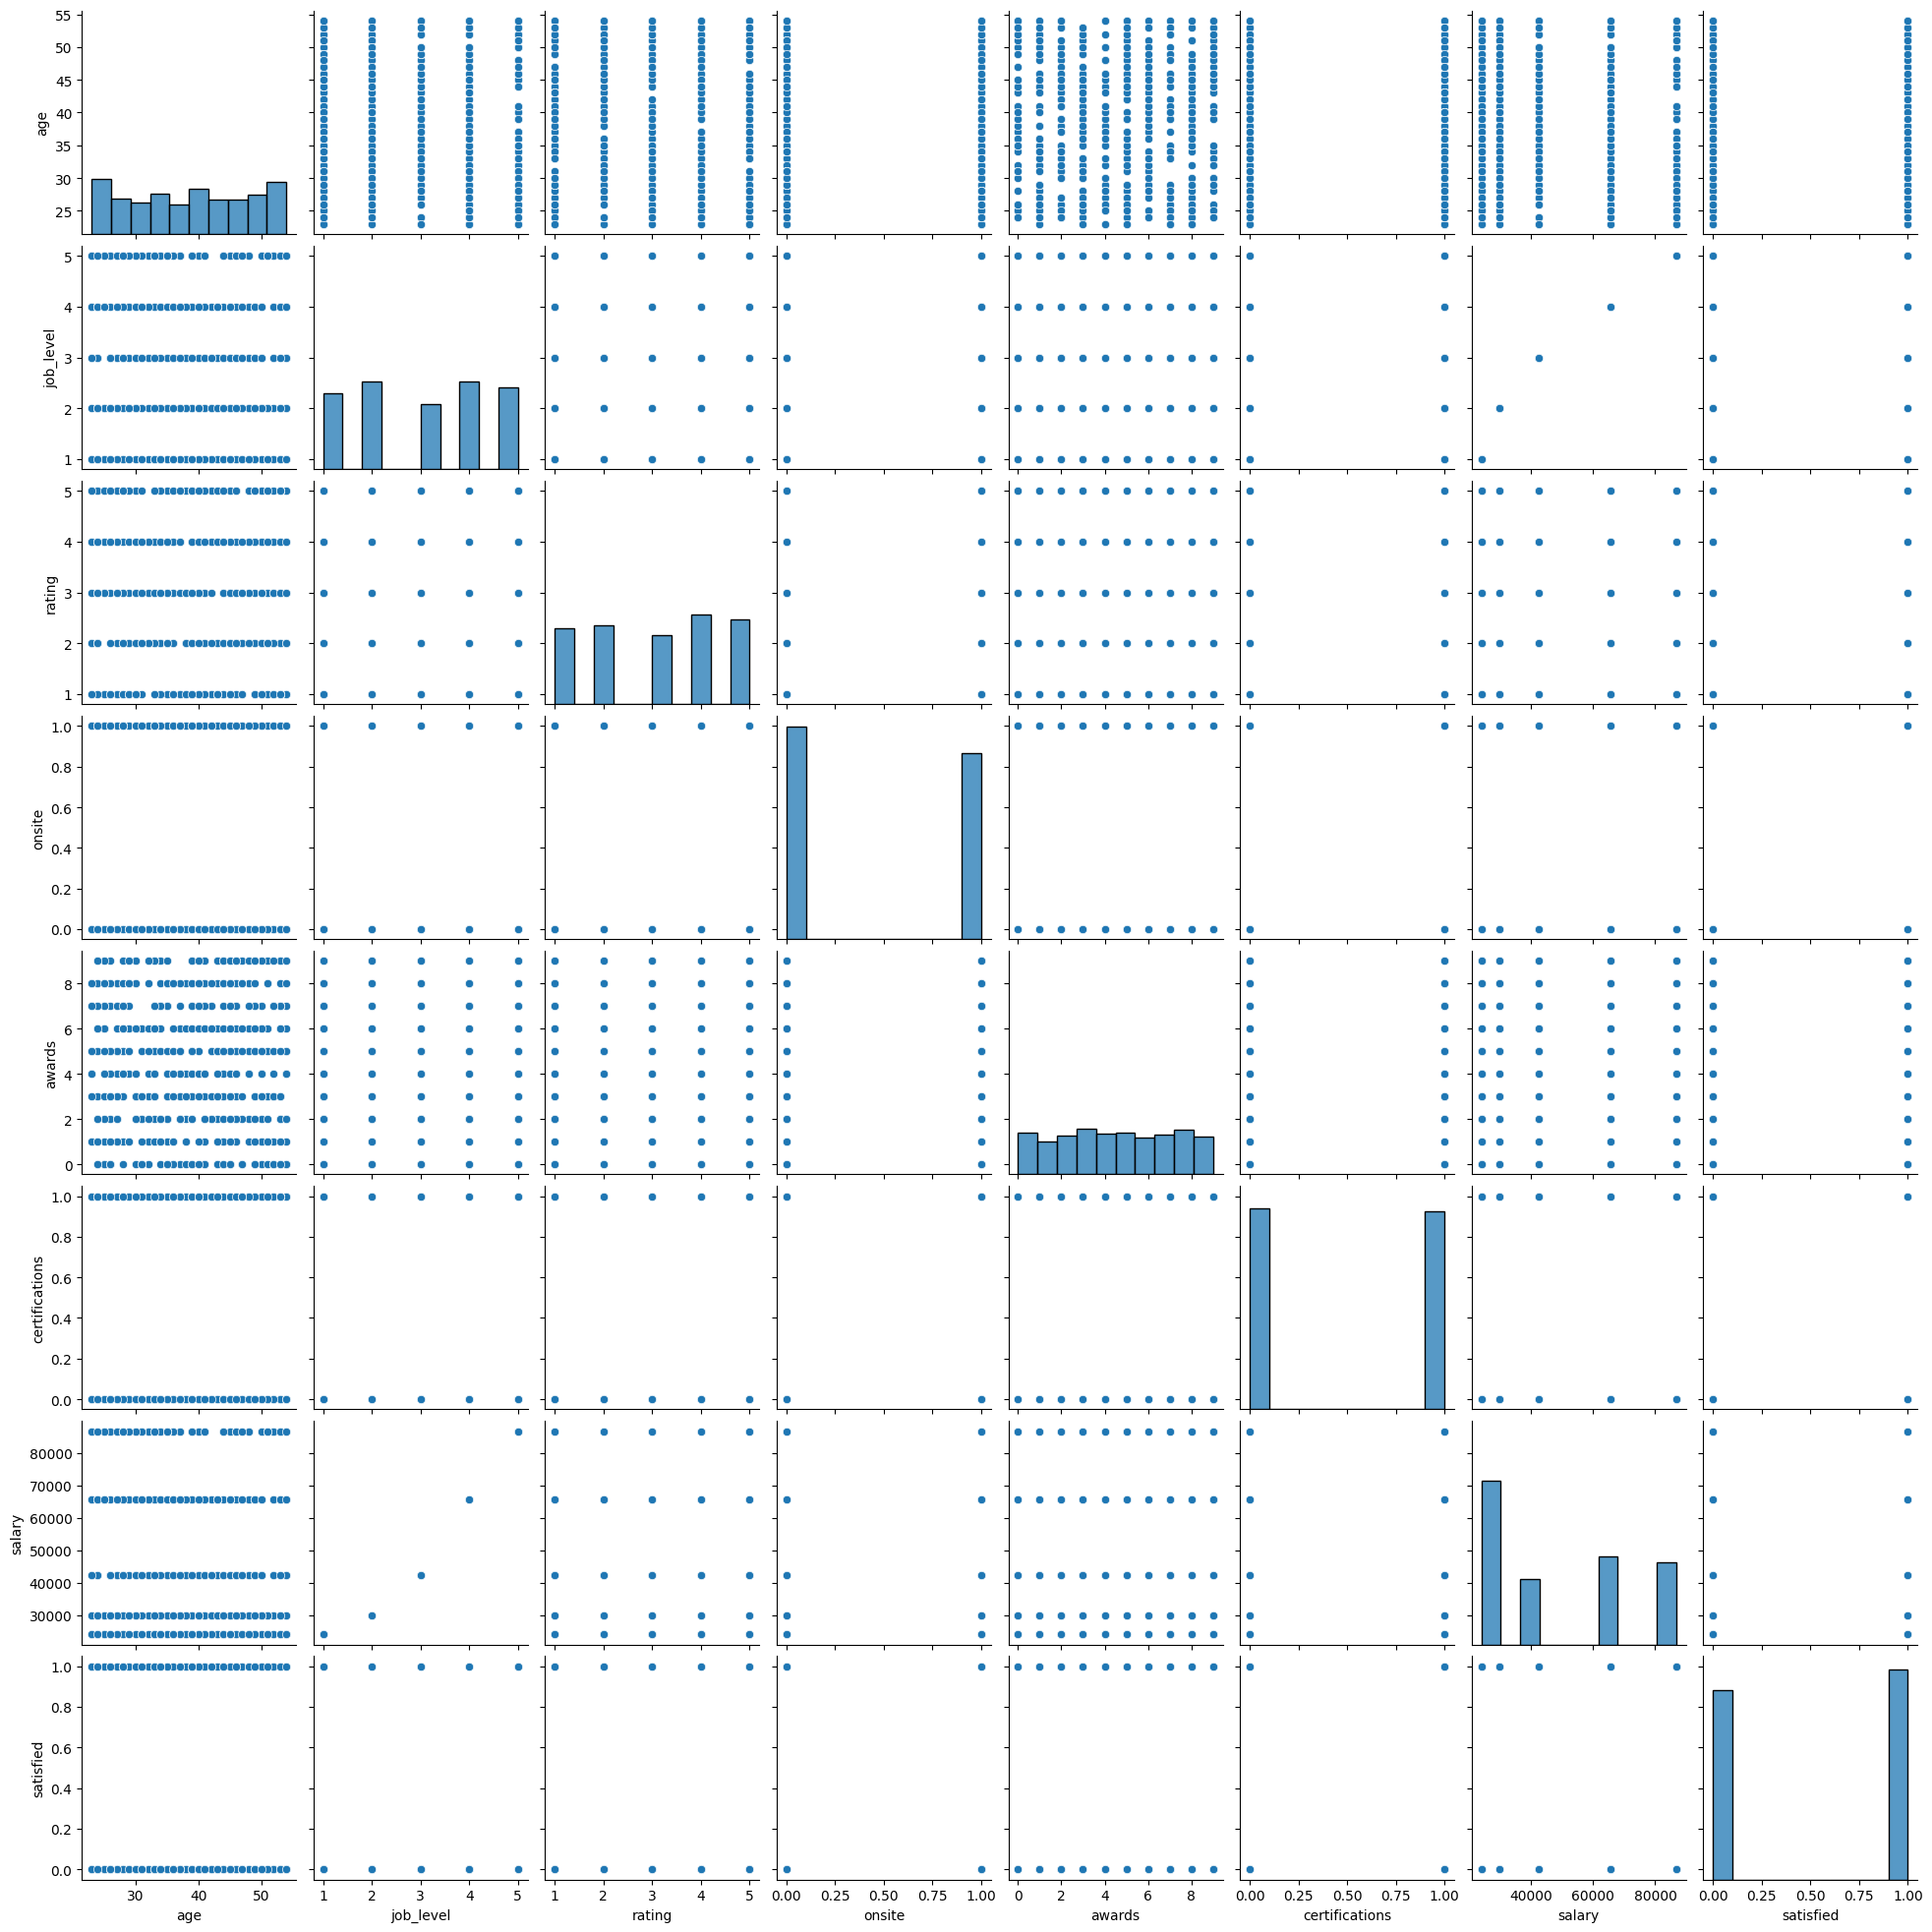

In [22]:
sns.pairplot(df)

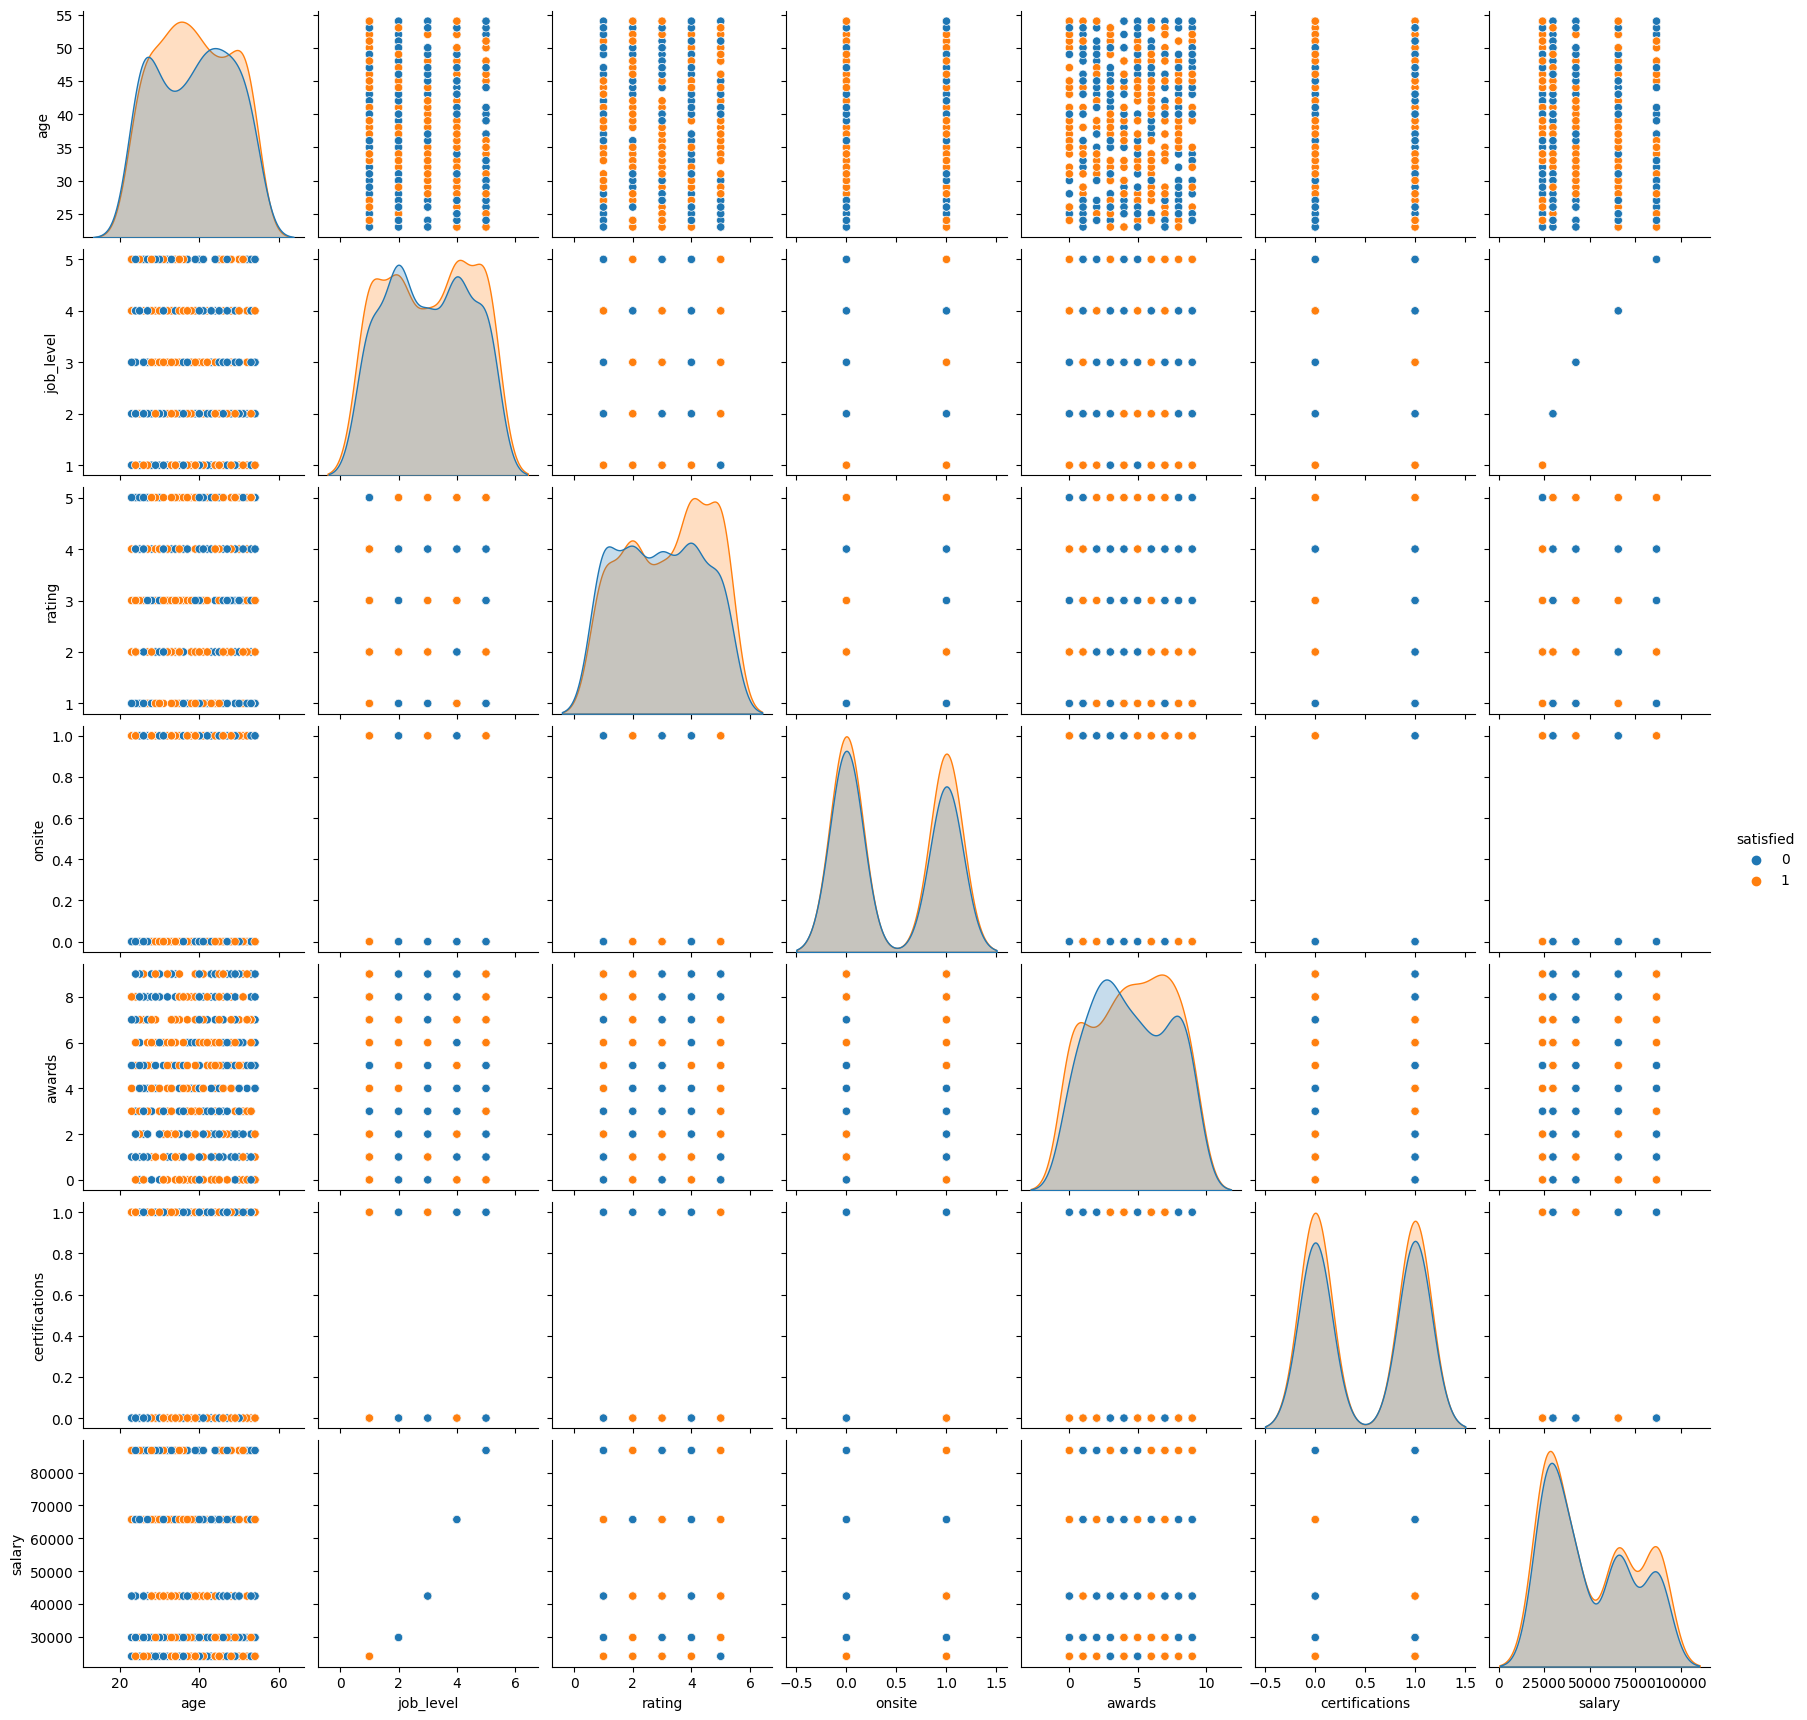

In [81]:
sns.pairplot(df, hue='satisfied')

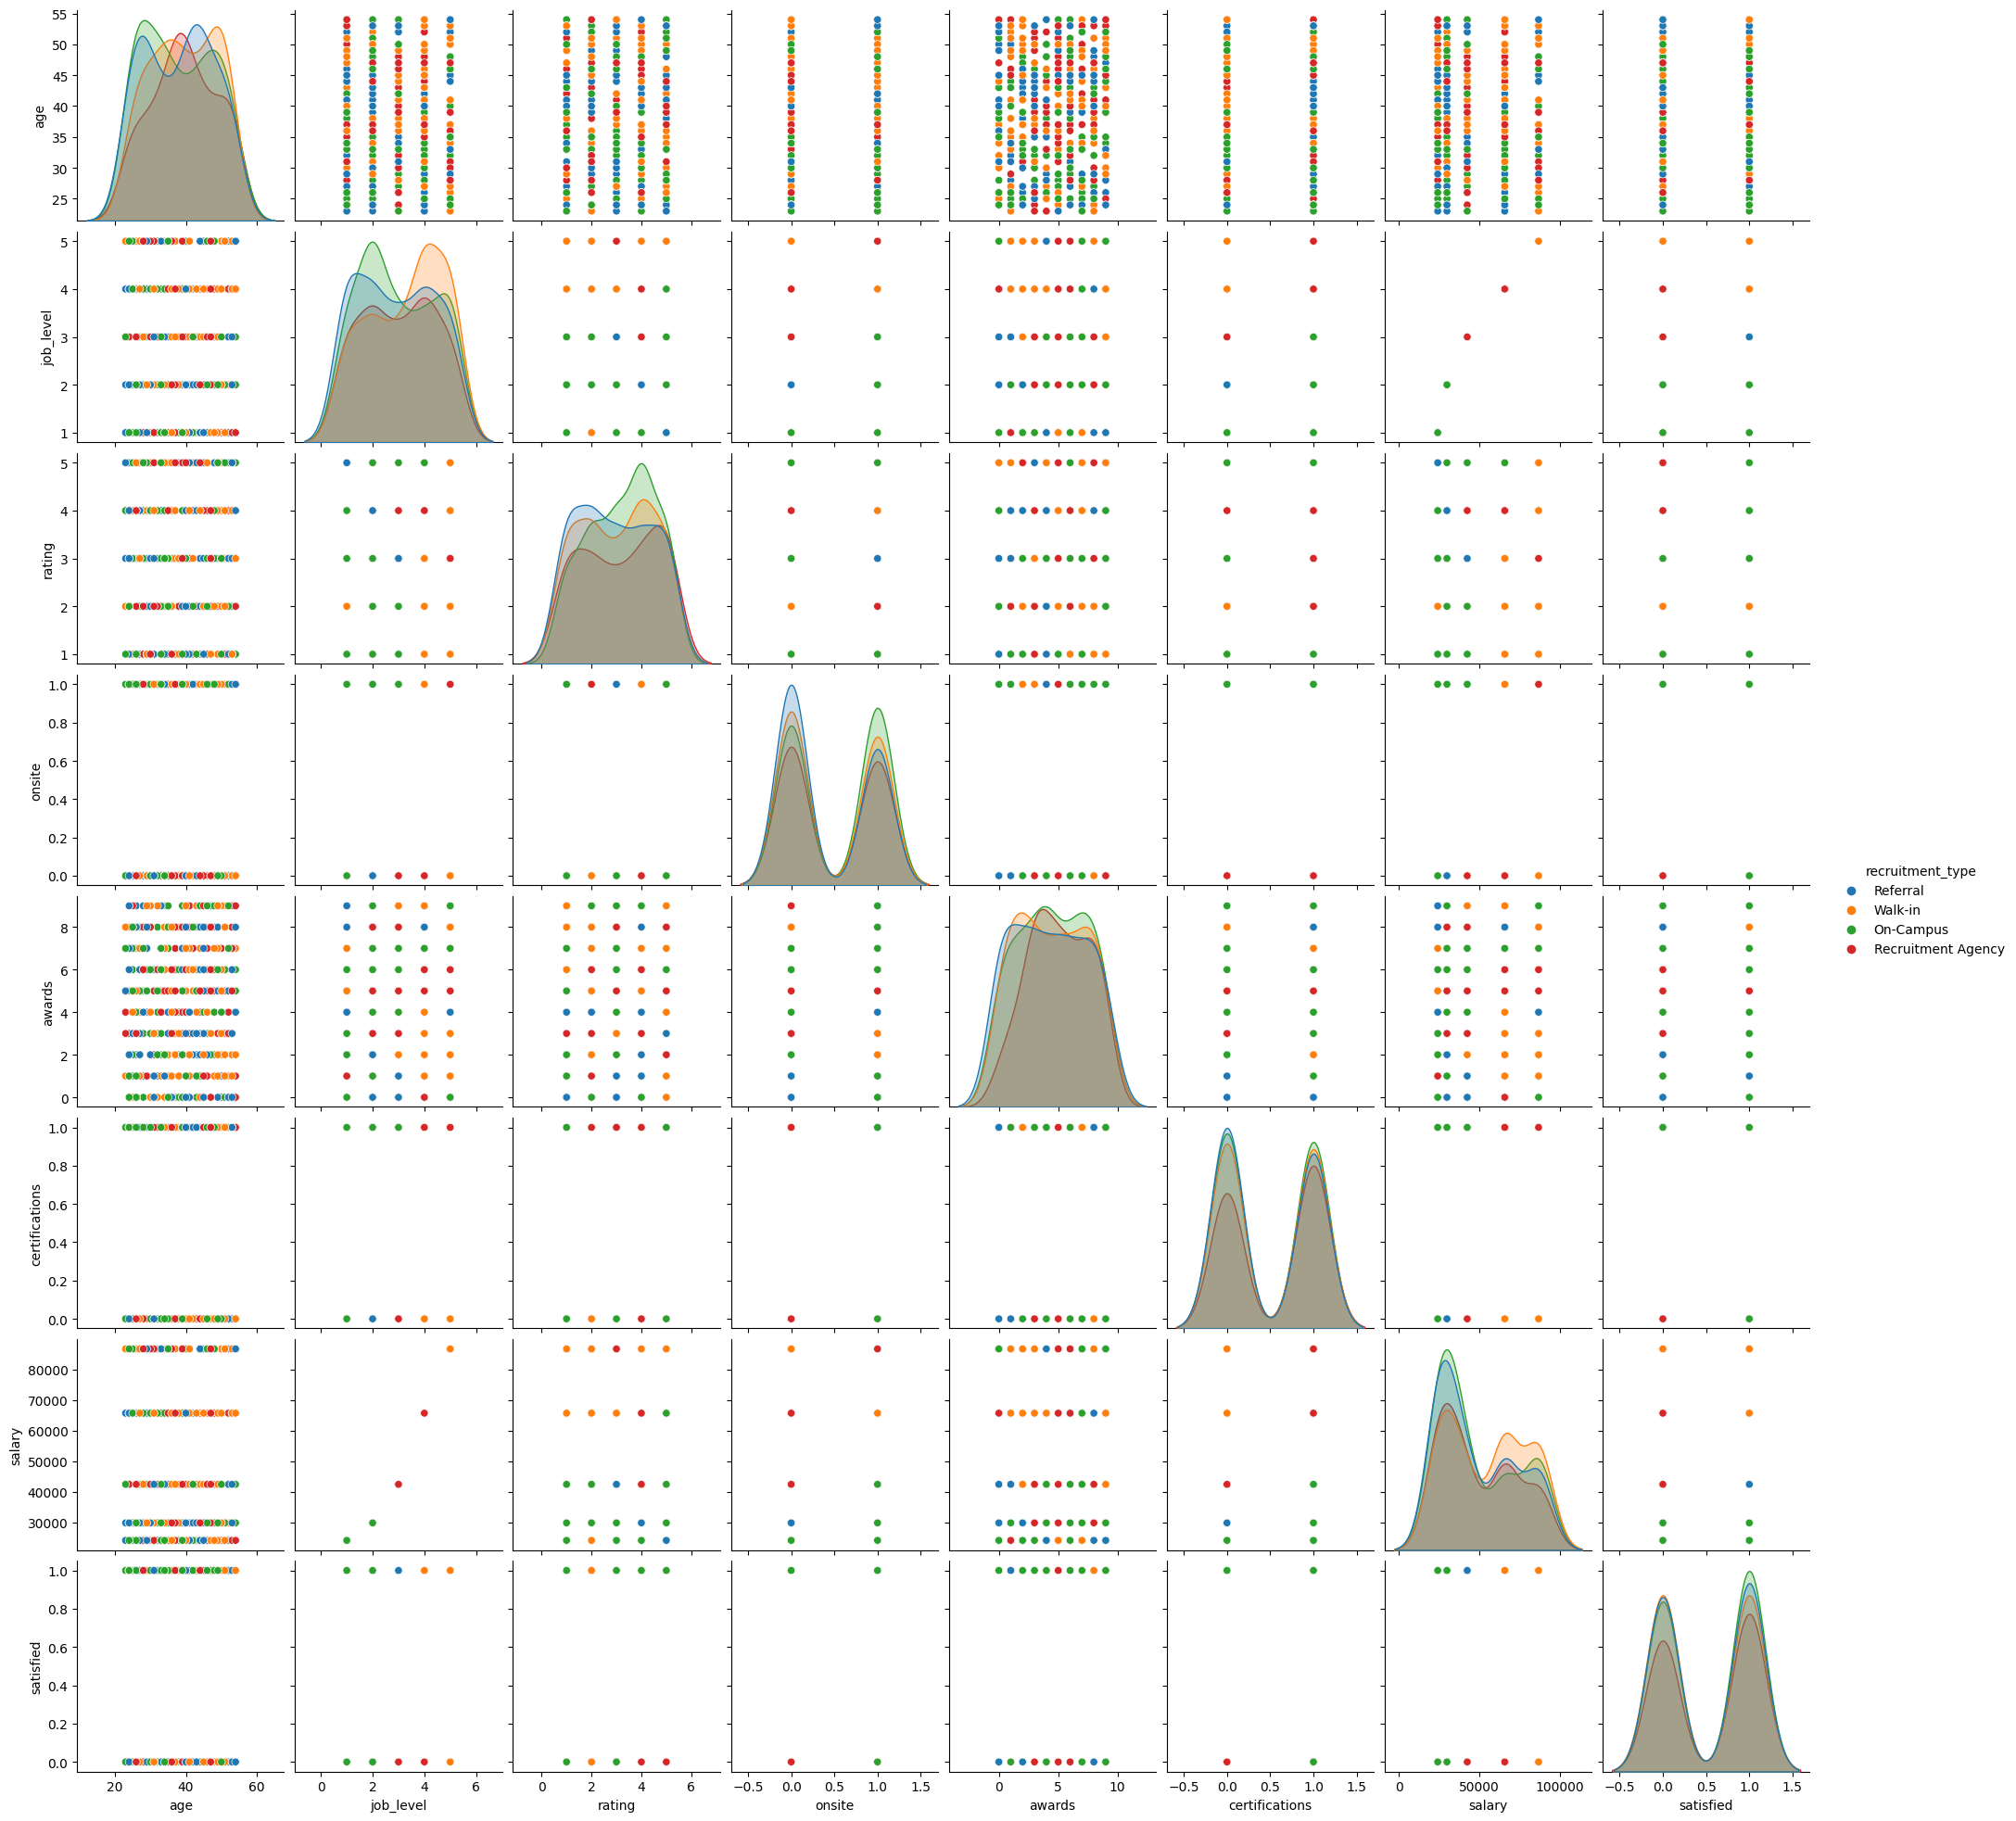

In [82]:
sns.pairplot(df, hue='recruitment_type')

One important thing to analyse is the correlation between the variables. There's a chance to find two or more independent variables highly correlated with each other, i.e., that produces a similar effect in the outcome variable. It's important to adress this issue to avoid multicolinearity problems that sometimes reduces the precision of the predictions of the models.
One way to see the correlation between the variables is the correlation matrix. Its results can be useful to discard highly correlated variables and to investigate the most relevant relations to the problem we are adressing.


<ipython-input-36-555b48b65638>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = df.corr()


<Axes: >

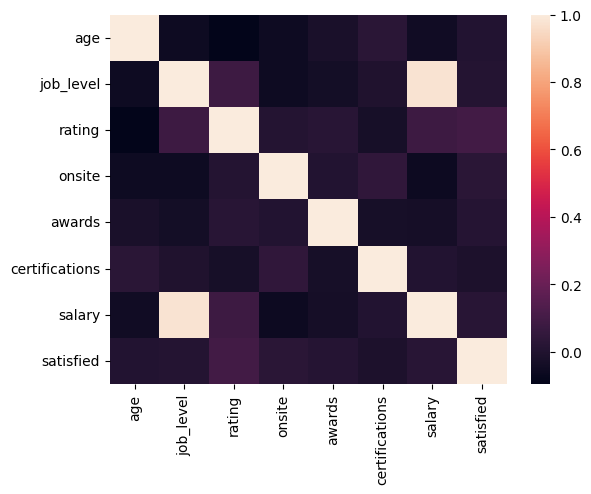

In [36]:
corrs = df.corr()
sns.heatmap(corrs)

In [37]:
corrs

,age,job_level,rating,onsite,awards,certifications,salary,satisfied
age,1.000000,-0.057528,-0.096388,-0.054055,-0.019875,0.025335,-0.048294,0.004490
job_level,-0.057528,1.000000,0.081829,-0.054843,-0.037793,-0.002632,0.977539,0.010093
rating,-0.096388,0.081829,1.000000,0.009079,0.022983,-0.030503,0.081034,0.093024
onsite,-0.054055,-0.054843,0.009079,1.000000,0.003722,0.043558,-0.057936,0.027637
awards,-0.019875,-0.037793,0.022983,0.003722,1.000000,-0.030066,-0.032339,0.014763
certifications,0.025335,-0.002632,-0.030503,0.043558,-0.030066,1.000000,0.004594,-0.011600
salary,-0.048294,0.977539,0.081034,-0.057936,-0.032339,0.004594,1.000000,0.023168
satisfied,0.004490,0.010093,0.093024,0.027637,0.014763,-0.011600,0.023168,1.000000


As can be seen, the `salary` and `job_level` variables are highly correlated (almost 1) => basically, the net salary of the employee is highly correlated with the level of the job of the employee. Since it is a positive relation, it means that when one variable increases the other increases as well, representing a positive linear relationship.

Although this information, the following models will be estimated considering both variables. But, after that, we will estimate the models considering just one of them (2 different cases) in order to see if their relation has really an impact in the predictive performance of the models.

# Preprocessing of the data

Considering the type of the predictors:

* `"age"` - **Numerical** variable
* `"Dept"` - **Categorical** variable
* `"location"`- **Binary** variable
* `"education"` - **Binary** variable
* `"recruitment_type"` - **Categorical** variable
* `"job_level"` - **Categorical** variable
* `"rating"` - **Categorical** variable
* `"onsite"` - **Binary** variable
* `"awards"` - **Numerical** variable
* `"certifications"` - **Binary** variable
* `"salary"` - **Numerical** variable

Considering the outcome variable:

* `"satisfied"` - **Categorical** variable

So, we have a CLASSIFICATION PROBLEM.


The code below allows us to see if our dataset has any missing values (NA), which, if so, would require a special treatment.

In [6]:
df.isna().any(axis=0)

age                 False
Dept                False
location            False
education           False
recruitment_type    False
job_level           False
rating              False
onsite              False
awards              False
certifications      False
salary              False
satisfied           False
dtype: bool

As we can see, there is not NA values in the dataframe, so we do not need to apply any specific treatment.

Another aspect that is important to adress is the balancing of the dataset.

In [7]:
X = df.drop('satisfied', axis=1)
y = df['satisfied']

In [8]:
y.value_counts(normalize=True)

1    0.526
0    0.474
Name: satisfied, dtype: float64

Our dataset is slightly imbalanced, with a higher proportion of observations in the "satisfied" class (1) compared to the "not satisfied" class (0). Although this imbalance may not be extreme, it can still have implications for model estimation and predictive performance.

When dealing with imbalanced datasets, we need to be aware of the tendency of the model towards the majority class and the possible difficulties in predicting accurately the minority class.

In this sense, depending on the model, techniques for handling imbalanced data may be necessary.

This slight imbalance can also be seen in the histogram of the outcome variable shown above.






In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
remainder='passthrough')

As usual, we split the dataset into train (80%) and test (20%).

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# KNN (K-NEAREST NEIGHBORS) MODEL


In [43]:
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([
    ('pre', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_tr',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dept', 'location',
                                                   'education',
                                                   'recruitment_type',
                                                   'job_level', 'rating']),
                                                 ('num_tr', StandardScaler(),
                                                  ['age', 'awards',
                                                   'salary'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [44]:
#predictive performance of the model in the training set
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[146  56]
 [ 44 154]]
Accuracy Score = 0.75
Precision Score = 0.7684210526315789
Recall Score = 0.7227722772277227


In [45]:
#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[31 30]
 [19 20]]
Accuracy Score = 0.51
Precision Score = 0.62
Recall Score = 0.5081967213114754


As we can see, the predictive performance of the model is not good with K=3 which suggests that the chosen value for `n_neighbors` parameter may not be optimal for our dataset. However, this parameter can be adjusted. To improve the KNN model's performance, a grid search can be performed to explore different values of n_neighbors and identify the one that yields the best results.

Also, another important aspect is the discrepancy between the results of the predictive performance in the training and test set. A higher value of `n_neigbors` parameter can smooth out the decision boundaries and potentially reduce overfitting. Again, exploring different values can help us finding an optimal balance between bias and variance.


NOTE: As we want to predict what influences employee satisfaction, we are mainly interested in the "yes" classes which represent the satisfied employees. In this sense, in all models, when applying Grid SearchCV we will change its optimization goal to `scoring='roc_auc'` in order to press the model to improve the recall score.

In [46]:
from sklearn.model_selection import GridSearchCV

hyperparameters ={
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20] 
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=5, scoring = 'roc_auc'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[34 27]
 [15 24]]
Accuracy Score = 0.58
Precision Score = 0.6938775510204082
Recall Score = 0.5573770491803278


In [47]:
pipe.named_steps['grid'].best_params_

{'n_neighbors': 1}

The presence of overfitting became even more notorious because the difference between results became even greater. A possible solution to this would be add a regularization technique called distance weighting. Basically, this would assigned higher weights to closer neighbors and lower weights to farther neighbors. This can be done by simply setting `weights` parameter of KNeighborsClassifier to `distance`.

In [48]:
hyperparameters ={
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20] 
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(KNeighborsClassifier(weights='distance'), hyperparameters, cv=5))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[34 27]
 [15 24]]
Accuracy Score = 0.58
Precision Score = 0.6938775510204082
Recall Score = 0.5573770491803278


The results stay exactly the same. The last attempt to improve results is to try using a different distance measure. The default option is Euclidean distance, let's try with `manhattan` distance metric. Also known as L1 norm it calculates the distance as the sum of absolute differences between the coordinates.

In [49]:
pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(KNeighborsClassifier(weights='distance', metric='manhattan'), hyperparameters, cv=5))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[38 23]
 [21 18]]
Accuracy Score = 0.56
Precision Score = 0.6440677966101694
Recall Score = 0.6229508196721312


The results did not improve. Our last attempt is to correct the small imbalance in the dataset by using `RandomOverSampling` technique.  It is used to address class imbalance in a dataset by increasing the number of instances in the minority class. It aims to balance the class distribution by randomly duplicating samples from the minority class until both classes have a similar number of instances.

In [50]:
from imblearn.over_sampling import RandomOverSampler

pipe = Pipeline([
    ('grid', GridSearchCV(KNeighborsClassifier(weights='distance', metric='manhattan'), hyperparameters, cv=5))])

X= preprocessor.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

ros= RandomOverSampler(random_state=45)

X_train_res, y_train_res = ros.fit_resample(X_train,y_train)

pipe.fit(X_train_res, y_train_res)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[37 24]
 [21 18]]
Accuracy Score = 0.55
Precision Score = 0.6379310344827587
Recall Score = 0.6065573770491803


The results remain more or less the same, so we can conclude that this model is not good to adress the employee satisfaction problem.

# NAIVE BAYES MODEL

Since in our dataset we have categorical and numerical predictors we cannot use Naive Bayes, because the model only works with categorical predictors.
But, we can use another version of Naive Bayes, **`Gaussian Naive Bayes`** (GaussianNB), that works with numerical predictors.

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.naive_bayes import GaussianNB

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    ('gnb', GaussianNB())])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[108  94]
 [ 94 104]]
Accuracy Score = 0.53
Precision Score = 0.5346534653465347
Recall Score = 0.5346534653465347
[[29 32]
 [20 19]]
Accuracy Score = 0.48
Precision Score = 0.5918367346938775
Recall Score = 0.47540983606557374


As we can see, the results for this model are better than the previous one. However, since between training and test set there is a small difference we can suspect of overfitting. 

To deal with this we can apply a regularization to GNB like adjusting the smoothing parameter. This parameter, denoted as `var_smoothing`, is used to add a small amount of smoothing to the variance estimation. Increasing the value of alpha can reduce the impact of individual features, making the model less prone to overfitting.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'var_smoothing': [1e-9, 1e-7, 1e-5, 1e-3, 1e-1]
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(GaussianNB(), hyper, cv=5, scoring='roc_auc'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[108  94]
 [ 94 104]]
Accuracy Score = 0.53
Precision Score = 0.5346534653465347
Recall Score = 0.5346534653465347
[[30 31]
 [20 19]]
Accuracy Score = 0.49
Precision Score = 0.6
Recall Score = 0.4918032786885246


The results remain more or less the same. In order to try to improve the results we will adress the small imbalance of the dataset. We will do this through `RandomOverSampling` technique.

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler

X=df.drop('satisfied',axis=1)
y=df['satisfied']

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
    ('gnb', GaussianNB())])

X= preprocessor.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

ros= RandomOverSampler(random_state=45)

X_train_res, y_train_res = ros.fit_resample(X_train,y_train)

pipe.fit(X_train_res, y_train_res)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[107  95]
 [ 89 109]]
Accuracy Score = 0.54
Precision Score = 0.5459183673469388
Recall Score = 0.5297029702970297
[[28 33]
 [19 20]]
Accuracy Score = 0.48
Precision Score = 0.5957446808510638
Recall Score = 0.45901639344262296


The difference between the results increased a little bit. We can conclude that this model is not good to predict the employee satisfaction.

# TREES MODEL

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.tree import DecisionTreeClassifier

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    ('tree', DecisionTreeClassifier())])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[28 33]
 [15 24]]
Accuracy Score = 0.52
Precision Score = 0.6511627906976745
Recall Score = 0.45901639344262296


As we can see, with the train set the predictive performance of the model is perfect but with unseen data the performance decreases a lot. This suggests that the model is overfitting, i.e., is fitting also the noise of the model. And because the noise in the test set is different the prediction is very poor.

We need to stop the overfitting of the model, i.e., we need to prunce the tree to avoid it to be infinity pure. We can use the `ccp_alpha` to control the complexity of the tree and therefore, its overfitting.

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeClassifier(), hyper, cv=5, scoring='roc_auc'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [198   0]]
Accuracy Score = 0.505
Precision Score = 0.505
Recall Score = 1.0
[[61  0]
 [39  0]]
Accuracy Score = 0.61
Precision Score = 0.61
Recall Score = 1.0


In [93]:
pipe.named_steps['grid'].best_params_

{'ccp_alpha': 0.01}

The results remain exactly the same. We will try to correct the imabalance of the dataset in order to improve the results.

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), hyper, cv=5, scoring='roc_auc'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [198   0]]
Accuracy Score = 0.505
Precision Score = 0.505
Recall Score = 1.0
[[61  0]
 [39  0]]
Accuracy Score = 0.61
Precision Score = 0.61
Recall Score = 1.0


The results for the test set became a little bit worst. Our last attempt to improve the model is to try other hyperparameters commonly used in trees model such as `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes` and `criterion`.


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 5, 10],
    'criterion': ['gini', 'entropy']
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), hyper, cv=5, scoring='roc_auc'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[166  36]
 [ 80 118]]
Accuracy Score = 0.71
Precision Score = 0.6747967479674797
Recall Score = 0.8217821782178217
[[36 25]
 [25 14]]
Accuracy Score = 0.5
Precision Score = 0.5901639344262295
Recall Score = 0.5901639344262295


Even thought the model is not good, among all the trees sub models it is the best. The performance results between the training and test sets are closer than the others and the recall score is about 60% to unseen data, which is the higher value until now.

In [59]:
pipe.named_steps['grid'].best_params_

{'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

# RANDOM FORESTS MODEL

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.ensemble import RandomForestClassifier

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestClassifier())])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[31 30]
 [13 26]]
Accuracy Score = 0.57
Precision Score = 0.7045454545454546
Recall Score = 0.5081967213114754


Again, we will aplly the `class_weights='balanced` parameter to the model in order to try to mitigate the impact of the small imbalance of the dataset.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.ensemble import RandomForestClassifier

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestClassifier(class_weight='balanced'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[29 32]
 [15 24]]
Accuracy Score = 0.53
Precision Score = 0.6590909090909091
Recall Score = 0.47540983606557374


Since the discrepancy between the results in the training and test set remain we can suspect of overfitting. To prevent this phenomenom we can apply again the `ccp_alpha` hyperparameter as we did in the trees.

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(RandomForestClassifier(class_weight='balanced'), hyper, cv=5, scoring='roc_auc'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[32 29]
 [17 22]]
Accuracy Score = 0.54
Precision Score = 0.6530612244897959
Recall Score = 0.5245901639344263


The results remain more or less the same. We will try to optimize one more hyperparameter. Since random forests are an ensemble of individual decision trees it makes sense to use `n_estimators` hyperparameter in order to improve the performance of the model.

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper={
    'ccp_alpha': [0.001, 0.003, 0.1, 0.3, 0.5],
    'n_estimators':[10,50,100,150]
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(RandomForestClassifier(class_weight='balanced'), hyper, cv=5, scoring='roc_auc'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  1 197]]
Accuracy Score = 0.9975
Precision Score = 0.9950738916256158
Recall Score = 1.0
[[32 29]
 [22 17]]
Accuracy Score = 0.49
Precision Score = 0.5925925925925926
Recall Score = 0.5245901639344263


In [64]:
pipe.named_steps['grid'].best_params_

{'ccp_alpha': 0.003, 'n_estimators': 100}

The results did not change significantly. So, let's try to use several other hyperparameteres commonly used in random forest such as `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features` and `bootstrap`. 

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper ={
    'ccp_alpha': [0.001, 0.003, 0.1, 0.3, 0.5],
    'n_estimators':[10,50,100,150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(RandomForestClassifier(class_weight='balanced'), hyper, cv=5, scoring='roc_auc'))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[171  31]
 [ 32 166]]
Accuracy Score = 0.8425
Precision Score = 0.8423645320197044
Recall Score = 0.8465346534653465
[[26 35]
 [22 17]]
Accuracy Score = 0.43
Precision Score = 0.5416666666666666
Recall Score = 0.4262295081967213


Nor did the use of several parameters improve the results. We need another model.

# LOGISTIC REGRESSION MODEL


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.linear_model import LogisticRegression

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    ('logistic', LogisticRegression(max_iter=1000, class_weight="balanced"))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[115  87]
 [ 86 112]]
Accuracy Score = 0.5675
Precision Score = 0.572139303482587
Recall Score = 0.5693069306930693
[[31 30]
 [19 20]]
Accuracy Score = 0.51
Precision Score = 0.62
Recall Score = 0.5081967213114754


The results are not so distance as in the previous models we have seen, but we will try to improve them even so.

In [67]:
features_names = preprocessor.get_feature_names_out()
coefficients = pipe.named_steps['logistic'].coef_

import pandas as pd
variable_coeffs_df = pd.DataFrame({'Variable': features_names, 'Coefficient': coefficients.flatten()})
variable_coeffs_df

,Variable,Coefficient
0,cat_tr__Dept_Marketing,-0.171673
1,cat_tr__Dept_Purchasing,0.225952
2,cat_tr__Dept_Sales,0.129169
3,cat_tr__Dept_Technology,0.161107
4,cat_tr__location_Suburb,-0.115895
5,cat_tr__education_UG,-0.053769
6,cat_tr__recruitment_type_Recruitment Agency,0.045214
7,cat_tr__recruitment_type_Referral,-0.065761
8,cat_tr__recruitment_type_Walk-in,-0.243263
9,cat_tr__job_level_2,-0.195062


As results are a little bit different we can suspect of a small overfitting of the model. So, in order to adress this problem we will use `Lasso Regularization`.

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.linear_model import LogisticRegression

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    ('lr', LogisticRegression(penalty='l1', solver='saga', C=0.5, max_iter=1000, class_weight="balanced", random_state=45))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[112  90]
 [ 82 116]]
Accuracy Score = 0.57
Precision Score = 0.5773195876288659
Recall Score = 0.5544554455445545
[[27 34]
 [21 18]]
Accuracy Score = 0.45
Precision Score = 0.5625
Recall Score = 0.4426229508196721


As we can see, the results became worst. Instead of set a value of `C` at the outset, we will try to find the best value for this parameter that measures the inverse of the strength of the regularization.

In [69]:
features_names = preprocessor.get_feature_names_out()
coefficients = pipe.named_steps['lr'].coef_

import pandas as pd
variable_coeffs_df = pd.DataFrame({'Variable': features_names, 'Coefficient': coefficients.flatten()})
variable_coeffs_df

,Variable,Coefficient
0,cat_tr__Dept_Marketing,-0.137906
1,cat_tr__Dept_Purchasing,0.037419
2,cat_tr__Dept_Sales,0.000000
3,cat_tr__Dept_Technology,0.000000
4,cat_tr__location_Suburb,-0.031269
5,cat_tr__education_UG,0.000000
6,cat_tr__recruitment_type_Recruitment Agency,0.000000
7,cat_tr__recruitment_type_Referral,0.000000
8,cat_tr__recruitment_type_Walk-in,-0.109803
9,cat_tr__job_level_2,-0.009348


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'C': [0.001, 0.1, 0.15, 0.3, 0.5, 1.5]
}

pipe=Pipeline([
    ('pre',preprocessor),
    ('grid',GridSearchCV(LogisticRegression(penalty='l1',solver='saga',max_iter=1000,class_weight='balanced', random_state=45), hyper, cv=5, scoring='roc_auc'))
])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[113  89]
 [ 80 118]]
Accuracy Score = 0.5775
Precision Score = 0.5854922279792746
Recall Score = 0.5594059405940595
[[30 31]
 [23 16]]
Accuracy Score = 0.46
Precision Score = 0.5660377358490566
Recall Score = 0.4918032786885246


This model gives more or less the same performance as the previous one. But among the logistic sub models that we try the first one, the normal with only `max_iter=1000` and `class_weights='balanced`, is the one that gives the best performance, i.e., the onde which is more robust and generalizes best for unseen data.

In [71]:
pipe.named_steps['grid'].best_params_

{'C': 0.3}

# NEURAL NETWORKS MODEL

By default, hidden layers are 100, but it takes a lot of time to run the model.

In this case, we consider 3 hidden layers with 3, 4 and 5 neurons each one, respectively.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.neural_network import MLPClassifier

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
     ('pre', preprocessor),
     ('nn', MLPClassifier(hidden_layer_sizes=(3,4,5), max_iter=10000))])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[155  47]
 [ 73 125]]
Accuracy Score = 0.7
Precision Score = 0.6798245614035088
Recall Score = 0.7673267326732673
[[34 27]
 [22 17]]
Accuracy Score = 0.51
Precision Score = 0.6071428571428571
Recall Score = 0.5573770491803278


As  the results are quite far apart, we may suspect overfitting of the model. To prevent this issue, we can apply `L2 regularization` to the model which basically involves adding a regularization term to the loss function during training, which encourages the model to have smaller weights.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
}

pipe=Pipeline([
    ('pre',preprocessor),
    ('grid',GridSearchCV(MLPClassifier(hidden_layer_sizes=(3,4,5), max_iter=10000), hyper, cv=5, scoring='roc_auc'))
])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[132  70]
 [ 45 153]]
Accuracy Score = 0.7125
Precision Score = 0.7457627118644068
Recall Score = 0.6534653465346535
[[31 30]
 [21 18]]
Accuracy Score = 0.49
Precision Score = 0.5961538461538461
Recall Score = 0.5081967213114754


The resuls improved but the discrepancy between training and test set results increased as well, so our model is not so good. Our last attempt to improve the model's performance will be correct the small imbalance in the dataset. For this, we will use `RandomOverSampling` technique again.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'alpha': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
}

pipe=Pipeline([
    ('pre',preprocessor),
    ('grid',GridSearchCV(MLPClassifier(hidden_layer_sizes=(3,4,5), max_iter=10000), hyper, cv=5, scoring='roc_auc'))
])

X= preprocessor.fit_transform(X)

ros= RandomOverSampler(random_state=50)

X_train_res, y_train_res = ros.fit_resample(X_train,y_train)

pipe.fit(X_train_res, y_train_res)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [198   0]]
Accuracy Score = 0.505
Precision Score = 0.505
Recall Score = 1.0
[[61  0]
 [39  0]]
Accuracy Score = 0.61
Precision Score = 0.61
Recall Score = 1.0


The results are not so good but to compensate the difference between training and test sets results is very small, which means that the model is relatively good generalizing to unseen data.

# SUPPORT VECTOR MACHINE (SVM) MODEL

This is a model not taught in class.

Support Vector Machines (SVM) is a classification algorithm that aims to find an optimal decision boundary between different classes. It achieves this by maximizing the margin, which is the distance between the decision boundary and the nearest data points. SVM can handle both linearly and non-linearly separable data by using a technique called the kernel trick, which transforms the data into a higher-dimensional space. This allows SVM to find a linear decision boundary in the transformed space. SVM is known for its ability to handle high-dimensional data and its effectiveness in handling complex **classification problems**. Additionally, SVM is robust to outliers and can handle imbalanced datasets.

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.svm import SVC

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe=Pipeline([
    ('pre',preprocessor),
    ('SVM',SVC())
])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[171  31]
 [ 48 150]]
Accuracy Score = 0.8025
Precision Score = 0.7808219178082192
Recall Score = 0.8465346534653465
[[28 33]
 [22 17]]
Accuracy Score = 0.45
Precision Score = 0.56
Recall Score = 0.45901639344262296


Given that the results are not very good, we will optimize some hyperparameters commonly used in this model: `C` which is the regularization parameter which controls the penalty for classification errors, being the inverse of it; the `kernel` which defines the type of kernel function to be used in SVM; and `gamma` which is specific to the radial basis function (RBL) kernel, one of the common `kernel` options. These parameters allow you to adjust the performance and capacity of the SVM model. Through a grid and cross-validation we can find the model configuration that best fits the data.

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

hyper = {
    'C': [0.1,0.2,0.5,0.8, 1, 2, 3, 4, 5, 10],  
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.001, 0.01, 0.1, 1]  # Kernel coefficient
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('svm', GridSearchCV(SVC(class_weight='balanced'), hyper, cv=5, scoring='roc_auc'))
])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  1 197]]
Accuracy Score = 0.9975
Precision Score = 0.9950738916256158
Recall Score = 1.0
[[34 27]
 [22 17]]
Accuracy Score = 0.51
Precision Score = 0.6071428571428571
Recall Score = 0.5573770491803278


The results improved a little bit but the difference between both sets increased and means that the model is not good generalizing to new data points.

In [77]:
pipe.named_steps['svm'].best_params_

{'C': 0.8, 'gamma': 1, 'kernel': 'rbf'}

# XGBOOST MODEL

This is a model not taught in class.

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm used for classification and regression tasks. It is an ensemble model that combines the predictions of multiple individual decision trees to make accurate predictions. In the context of classification problems, XGBoost works by iteratively adding decision trees to the ensemble while minimizing a specific loss function. Each new tree is trained to correct the mistakes made by the previous trees, gradually improving the overall prediction performance. XGBoost employs a technique called gradient boosting, which involves calculating the gradients of the loss function with respect to the predictions made by the ensemble. It then uses these gradients to update the model parameters and improve the predictions in subsequent iterations. The key advantages of XGBoost include its ability to handle complex relationships between features and handle imbalanced datasets. It also provides regularization techniques to prevent overfitting, such as controlling the complexity of individual trees.

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import  recall_score

from xgboost import XGBClassifier

X=df.drop('satisfied',axis=1)
y=df['satisfied']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

cat_col = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating']
num_col = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_col),
    ('num_tr', StandardScaler(), num_col)],
    remainder='passthrough')

pipe = Pipeline([
    ('pre', preprocessor),
    ('XGBoost', XGBClassifier())
])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[202   0]
 [  0 198]]
Accuracy Score = 1.0
Precision Score = 1.0
Recall Score = 1.0
[[30 31]
 [18 21]]
Accuracy Score = 0.51
Precision Score = 0.625
Recall Score = 0.4918032786885246


As we can see, since the results between both sets are so different, we can suspect of overfitting. As we know, XGBoost model has a regularization technique that controls overfitting, controling the complexity of the trees. Let's apply it!

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

X = df.drop('satisfied', axis=1)
y = df['satisfied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

cat_cols = ['Dept', 'location', 'education', 'recruitment_type', 'job_level', 'rating', 'onsite', 'certifications']
num_cols = ['age', 'awards', 'salary']

preprocessor = ColumnTransformer([
    ('cat_tr', OneHotEncoder(drop='first'), cat_cols),
    ('num_tr', StandardScaler(), num_cols)],
    remainder='passthrough')

hyper = {
    'reg_alpha': [0.1, 0.5, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0]
}

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(XGBClassifier(), hyper, cv=5, scoring='roc_auc'))
])

pipe.fit(X_train, y_train)

#predictive performance of the model in the training set
y_pred = pipe.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_train, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_train, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_train, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

#predictive performance of the model in the test set
y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels = [1, 0])
print(cm)
accur = accuracy_score(y_test, y_pred)
print(f'Accuracy Score = {accur}')
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision Score = {precision}')
recall = recall_score(y_test, y_pred, pos_label=1)
print(f'Recall Score = {recall}')

[[198   4]
 [  4 194]]
Accuracy Score = 0.98
Precision Score = 0.9801980198019802
Recall Score = 0.9801980198019802
[[27 34]
 [15 24]]
Accuracy Score = 0.51
Precision Score = 0.6428571428571429
Recall Score = 0.4426229508196721


In [80]:
pipe.named_steps['grid'].best_params_

{'reg_alpha': 1.0, 'reg_lambda': 0.1}

The results remain more or less the same, which means that overfitting persists and our model is not good generalizing new data, being useless.